In [50]:
import streamlit as st
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import plotly as px
import scipy.io.wavfile as wavfile
import requests
from os import path
from pydub import AudioSegment
import matplotlib.pyplot as plt

In [2]:
SPOTIPY_CLIENT_ID='f828a276a125406f8647e22c86428f3f'
SPOTIPY_CLIENT_SECRET='0ff5d58c70414cf189faee8d6df4cd66'

spotify = spotipy.Spotify(client_credentials_manager=
                          SpotifyClientCredentials(SPOTIPY_CLIENT_ID, 
                                                   SPOTIPY_CLIENT_SECRET))

In [3]:
def get_search_results(client, query):
  result = client.search(query, limit=1, type='artist')
  return result

In [4]:
get_search_results(spotify, 'Kanye')['artists']['items'][0]['name']

'Kanye West'

In [5]:
get_search_results(spotify, 'Kanye')['artists']['items'][0]['uri']

'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'

In [6]:
results = spotify.artist_top_tracks('spotify:artist:5K4W6rqBFWDnAN6FQUkS6x')

In [7]:
features = []
for track in results['tracks']: 
    print(track['name'])
    print(track['uri'])
    features.append(spotify.audio_features(track['uri'])[0])
    print(' ')

Heartless
spotify:track:4EWCNWgDS8707fNSZ1oaA5
 
Ni**as In Paris
spotify:track:4Li2WHPkuyCdtmokzW2007
 
Flashing Lights
spotify:track:5TRPicyLGbAF2LGBFbHGvO
 
Bound 2
spotify:track:3sNVsP50132BTNlImLx70i
 
Father Stretch My Hands Pt. 1
spotify:track:4KW1lqgSr8TKrvBII0Brf8
 
Stronger
spotify:track:0j2T0R9dR9qdJYsB7ciXhf
 
I Wonder
spotify:track:7rbECVPkY5UODxoOUVKZnA
 
Gold Digger
spotify:track:1PS1QMdUqOal0ai3Gt7sDQ
 
Violent Crimes
spotify:track:3s7MCdXyWmwjdcWh7GWXas
 
Homecoming
spotify:track:4iz9lGMjU1lXS51oPmUmTe
 


In [8]:
audio_features = pd.DataFrame(features[0], index=[0])

In [9]:
audio_features.drop(columns=["type", "id", "uri", "track_href", "analysis_url"])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.79,0.647,10,-5.983,0,0.136,0.0515,0,0.248,0.654,87.999,211000,4


In [10]:
top_result = spotify.search('Kanye All The Lights', limit=1, type='track')['tracks']['items'][0]
top_result['name'], top_result['album']['name'], top_result['uri'], top_result['popularity']

('All Of The Lights',
 'My Beautiful Dark Twisted Fantasy',
 'spotify:track:22L7bfCiAkJo5xGSQgmiIO',
 78)

In [21]:
top_result['album']['external_urls']['spotify']

'https://open.spotify.com/album/20r762YmB5HeofjMCiPMLv'

In [11]:
top_result

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'},
    'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x',
    'id': '5K4W6rqBFWDnAN6FQUkS6x',
    'name': 'Kanye West',
    'type': 'artist',
    'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
  

In [13]:
artist = spotify.artist('spotify:artist:5K4W6rqBFWDnAN6FQUkS6x')
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'},
 'followers': {'href': None, 'total': 19615145},
 'genres': ['chicago rap', 'rap'],
 'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x',
 'id': '5K4W6rqBFWDnAN6FQUkS6x',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb867008a971fae0f4d913f63a',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174867008a971fae0f4d913f63a',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178867008a971fae0f4d913f63a',
   'width': 160}],
 'name': 'Kanye West',
 'popularity': 92,
 'type': 'artist',
 'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}

In [18]:
artist['followers']['total'], artist['popularity'], artist['external_urls']['spotify']

(19615145, 92, 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x')

In [39]:
r = requests.get(top_result['preview_url'])
open('Audio/preview.wav', 'wb').write(r.content)

360479

In [48]:
# files                                                                         
src = "Audio/preview.mp3"
dst = "Audio/preview_converted.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='Audio/preview_converted.wav'>

In [52]:
Fs, audio = wavfile.read('Audio/preview_converted.wav')

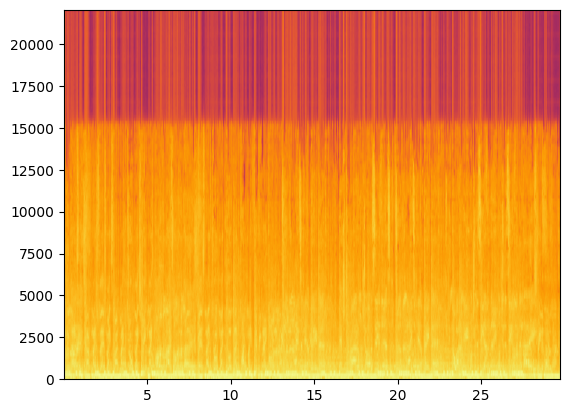

In [61]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(audio[:,0], Fs=Fs, cmap='inferno')
#powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(audio[:,1], Fs=Fs) # second channel of stereo
plt.show()